Video Explaination: https://drive.google.com/file/d/1vrrBjUmM1LZ-0PpVssC3Ex76p5taUWwe/view?usp=sharing

# Data Cleaning & Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('books_raw_data.csv')
df.head()

,book_name,author,genres_list,pages_format,first_published_year,rating,ratings_count,score,votes,book_url
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"['Young Adult', 'Dystopia', 'Fiction', 'Fantas...","374 pages, Hardcover",2008.0,4.35 avg rating,"9,825,418 ratings","score: 4,318,854","43,905 people voted",https://www.goodreads.com/book/show/2767052-th...
1,Pride and Prejudice,Jane Austen,"['Classics', 'Romance', 'Fiction', 'Historical...","279 pages, Paperback",1813.0,4.29 avg rating,"4,762,344 ratings","score: 2,966,459","30,399 people voted",https://www.goodreads.com/book/show/1885.Pride...
2,To Kill a Mockingbird,Harper Lee,"['Classics', 'Fiction', 'Historical Fiction', ...","323 pages, Paperback",1960.0,4.26 avg rating,"6,833,106 ratings","score: 2,602,221","26,573 people voted",https://www.goodreads.com/book/show/2657.To_Ki...
3,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,"['Fantasy', 'Fiction', 'Young Adult', 'Harry P...","896 pages, Hardcover",2003.0,4.50 avg rating,"3,771,857 ratings","score: 2,080,496","21,168 people voted",https://www.goodreads.com/book/show/58613451-h...
4,The Book Thief,Markus Zusak,"['Historical Fiction', 'Fiction', 'Young Adult...","592 pages, Kindle Edition",2005.0,4.39 avg rating,"2,859,705 ratings","score: 1,970,739","20,242 people voted",https://www.goodreads.com/book/show/19063.The_...


In [ ]:
# Number of rows and cloumns in df
df.shape

(1000, 10)

In [ ]:
# Check the info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   book_name             1000 non-null   object 
 1   author                1000 non-null   object 
 2   genres_list           1000 non-null   object 
 3   pages_format          999 non-null    object 
 4   first_published_year  999 non-null    float64
 5   rating                1000 non-null   object 
 6   ratings_count         1000 non-null   object 
 7   score                 1000 non-null   object 
 8   votes                 1000 non-null   object 
 9   book_url              1000 non-null   object 
dtypes: float64(1), object(9)
memory usage: 78.3+ KB


##### Fix the Gernre

In [ ]:
# Remove brackets and quotes, then split and take first genre
df['primary_genre'] = df['genres_list'].astype(str)\
                                       .str.replace("[","")\
                                       .str.replace("]","")\
                                       .str.replace("'","")\
                                       .str.split(",")\
                                       .str[0]\
                                       .str.strip()

# View cleaned categories
df['primary_genre'].value_counts()

,count
primary_genre,
Fiction,213
Fantasy,197
Classics,190
Young Adult,73
Romance,44
Thriller,37
Historical Fiction,37
Nonfiction,36
Horror,35


In [ ]:
df[df["primary_genre"] == ""]

,book_name,author,genres_list,pages_format,first_published_year,rating,ratings_count,score,votes,book_url,primary_genre
210,The Three Musketeers,Alexandre Dumas,[],NaN,NaN,4.10 avg rating,"345,850 ratings","score: 107,587","1,349 people voted",https://www.goodreads.com/book/show/7190.The_T...,


In [ ]:
## Repalce the blavk space with mode of primary_genres

mode_genre = df['primary_genre'].mode()[0]
df['primary_genre'] = df['primary_genre'].replace("", mode_genre)

In [ ]:
df[df["primary_genre"] == ""]

,book_name,author,genres_list,pages_format,first_published_year,rating,ratings_count,score,votes,book_url,primary_genre


##### Separate Number of Pages and Type of Book

In [ ]:
# Number of pages
df["number_of_pages"] = df["pages_format"].str.extract(r'(\d+)').astype(float)

In [ ]:
df["number_of_pages"].isnull().sum()

np.int64(6)

In [ ]:
df[df["number_of_pages"].isnull()]

,book_name,author,genres_list,pages_format,first_published_year,rating,ratings_count,score,votes,book_url,primary_genre,number_of_pages
210,The Three Musketeers,Alexandre Dumas,[],NaN,NaN,4.10 avg rating,"345,850 ratings","score: 107,587","1,349 people voted",https://www.goodreads.com/book/show/7190.The_T...,Fiction,NaN
533,[No Country for Old Men] (By: Cormac McCarthy)...,Cormac McCarthy,"['Fiction', 'Thriller', 'Westerns', 'Crime', '...",Paperback,2005.0,4.17 avg rating,"244,718 ratings","score: 26,432",294 people voted,https://www.goodreads.com/book/show/131313317-...,Fiction,NaN
535,"The Black Dahlia Ellroy, James ( Author ) Aug-...",James Ellroy,"['Mystery', 'Fiction', 'Crime', 'Noir', 'Histo...",Paperback,1987.0,3.78 avg rating,"95,806 ratings","score: 26,332",291 people voted,https://www.goodreads.com/book/show/128765450-...,Mystery,NaN
567,"In Cold Blood by Truman Capote [Random,2002]",Truman Capote,"['Nonfiction', 'Classics', 'True Crime', 'Crim...",Hardcover,1966.0,4.09 avg rating,"725,474 ratings","score: 24,714",274 people voted,https://www.goodreads.com/book/show/143416043-...,Nonfiction,NaN
610,"We Need to Talk About Kevin by Shriver, Lionel...",Lionel Shriver,"['Fiction', 'Book Club', 'Thriller', 'Contempo...",Paperback,2003.0,4.08 avg rating,"211,759 ratings","score: 21,097",235 people voted,https://www.goodreads.com/book/show/130739876-...,Fiction,NaN
924,The Polymorph,Max Nowaz,"['Science Fiction', 'Space', 'Fiction', 'Teen'...",Kindle Edition,2023.0,4.27 avg rating,"14,652 ratings","score: 10,954",117 people voted,https://www.goodreads.com/book/show/101265124-...,Science Fiction,NaN


In [ ]:
## Fill the NUll values in the number_of_pages with mean
df["number_of_pages"] = df["number_of_pages"].fillna(df["number_of_pages"].mean())
df["number_of_pages"] = df["number_of_pages"].astype(int)

In [ ]:
df["number_of_pages"].isnull().sum()

np.int64(0)

In [ ]:
df.head()

,book_name,author,genres_list,pages_format,first_published_year,rating,ratings_count,score,votes,book_url,primary_genre,number_of_pages
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"['Young Adult', 'Dystopia', 'Fiction', 'Fantas...","374 pages, Hardcover",2008.0,4.35 avg rating,"9,825,418 ratings","score: 4,318,854","43,905 people voted",https://www.goodreads.com/book/show/2767052-th...,Young Adult,374
1,Pride and Prejudice,Jane Austen,"['Classics', 'Romance', 'Fiction', 'Historical...","279 pages, Paperback",1813.0,4.29 avg rating,"4,762,344 ratings","score: 2,966,459","30,399 people voted",https://www.goodreads.com/book/show/1885.Pride...,Classics,279
2,To Kill a Mockingbird,Harper Lee,"['Classics', 'Fiction', 'Historical Fiction', ...","323 pages, Paperback",1960.0,4.26 avg rating,"6,833,106 ratings","score: 2,602,221","26,573 people voted",https://www.goodreads.com/book/show/2657.To_Ki...,Classics,323
3,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,"['Fantasy', 'Fiction', 'Young Adult', 'Harry P...","896 pages, Hardcover",2003.0,4.50 avg rating,"3,771,857 ratings","score: 2,080,496","21,168 people voted",https://www.goodreads.com/book/show/58613451-h...,Fantasy,896
4,The Book Thief,Markus Zusak,"['Historical Fiction', 'Fiction', 'Young Adult...","592 pages, Kindle Edition",2005.0,4.39 avg rating,"2,859,705 ratings","score: 1,970,739","20,242 people voted",https://www.goodreads.com/book/show/19063.The_...,Historical Fiction,592


In [ ]:
# Type of Book
df["book_type"] = df["pages_format"].str.replace("pages", "").str.extract(r'([A-Za-z]+)')

In [ ]:
df["book_type"].value_counts()

,count
book_type,
Paperback,488
Hardcover,304
Mass,113
Kindle,71
ebook,20
Board,1
Leather,1
Nook,1


In [ ]:
df["book_type"].isnull().sum()

np.int64(1)

In [ ]:
df[df["book_type"].isnull()]

,book_name,author,genres_list,pages_format,first_published_year,rating,ratings_count,score,votes,book_url,primary_genre,number_of_pages,book_type
210,The Three Musketeers,Alexandre Dumas,[],NaN,NaN,4.10 avg rating,"345,850 ratings","score: 107,587","1,349 people voted",https://www.goodreads.com/book/show/7190.The_T...,Fiction,424,NaN


In [ ]:
## Fill the NUll values in the book_type with mode
df["book_type"] = df["book_type"].fillna(df["book_type"].mode()[0])

In [ ]:
df["book_type"].isnull().sum()

np.int64(0)

##### Fix First Published Year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   book_name             1000 non-null   object 
 1   author                1000 non-null   object 
 2   genres_list           1000 non-null   object 
 3   pages_format          999 non-null    object 
 4   first_published_year  999 non-null    float64
 5   rating                1000 non-null   object 
 6   ratings_count         1000 non-null   object 
 7   score                 1000 non-null   object 
 8   votes                 1000 non-null   object 
 9   book_url              1000 non-null   object 
 10  primary_genre         1000 non-null   object 
 11  number_of_pages       1000 non-null   int64  
 12  book_type             1000 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 101.7+ KB


In [ ]:
# Fill null values with Medium and Convert Year into integer
df["first_published_year"] = df["first_published_year"].fillna(df["first_published_year"].median())
df["first_published_year"] = df["first_published_year"].astype(int)
df["first_published_year"].dtype

dtype('int64')

In [ ]:
df[df['book_name'] == 'The Three Musketeers']

,book_name,author,genres_list,pages_format,first_published_year,rating,ratings_count,score,votes,book_url,primary_genre,number_of_pages,book_type
210,The Three Musketeers,Alexandre Dumas,[],NaN,1998,4.10 avg rating,"345,850 ratings","score: 107,587","1,349 people voted",https://www.goodreads.com/book/show/7190.The_T...,Fiction,424,Paperback


##### Extract Rating

In [ ]:
## Extract only rating from rating columns
df["rating"] = df["rating"].str.extract(r'(\d\.\d+)').astype(float)
df["rating"].head()

,rating
0,4.35
1,4.29
2,4.26
3,4.50
4,4.39


In [ ]:
df["rating"].dtype

dtype('float64')

##### Extracting Ratings Count

In [ ]:
## Extract only rating from rating columns
df["ratings_count"] = df["ratings_count"].str.replace(",", "").str.extract(r'(\d+)').astype(int)
df["ratings_count"].head()

,ratings_count
0,9825418
1,4762344
2,6833106
3,3771857
4,2859705


In [ ]:
df.head()

,book_name,author,genres_list,pages_format,first_published_year,rating,ratings_count,score,votes,book_url,primary_genre,number_of_pages,book_type
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"['Young Adult', 'Dystopia', 'Fiction', 'Fantas...","374 pages, Hardcover",2008,4.35,9825418,"score: 4,318,854","43,905 people voted",https://www.goodreads.com/book/show/2767052-th...,Young Adult,374,Hardcover
1,Pride and Prejudice,Jane Austen,"['Classics', 'Romance', 'Fiction', 'Historical...","279 pages, Paperback",1813,4.29,4762344,"score: 2,966,459","30,399 people voted",https://www.goodreads.com/book/show/1885.Pride...,Classics,279,Paperback
2,To Kill a Mockingbird,Harper Lee,"['Classics', 'Fiction', 'Historical Fiction', ...","323 pages, Paperback",1960,4.26,6833106,"score: 2,602,221","26,573 people voted",https://www.goodreads.com/book/show/2657.To_Ki...,Classics,323,Paperback
3,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,"['Fantasy', 'Fiction', 'Young Adult', 'Harry P...","896 pages, Hardcover",2003,4.50,3771857,"score: 2,080,496","21,168 people voted",https://www.goodreads.com/book/show/58613451-h...,Fantasy,896,Hardcover
4,The Book Thief,Markus Zusak,"['Historical Fiction', 'Fiction', 'Young Adult...","592 pages, Kindle Edition",2005,4.39,2859705,"score: 1,970,739","20,242 people voted",https://www.goodreads.com/book/show/19063.The_...,Historical Fiction,592,Kindle


##### Extract Score

In [ ]:
## Extract only numbers of score from score
df["score"] = df["score"].str.replace(",", "").str.extract(r'(\d+)').astype(int)
df["score"].head()

,score
0,4318854
1,2966459
2,2602221
3,2080496
4,1970739


##### Extract Votes

In [ ]:
## Extract only numbers of votes from votes
df["votes"] = df["votes"].str.replace(",", "").str.extract(r'(\d+)').astype(int)
df["votes"].head()

,votes
0,43905
1,30399
2,26573
3,21168
4,20242


##### Feature Engineering: Pages Category

In [ ]:
# so here i have createed Pages category makes page count more human-friendly,
# improves visualization, and helps the model capture patterns in book length vs rating.
df['pages_category'] = pd.cut(
    df['number_of_pages'],
    bins=[0, 200, 400, 800, 5000],
    labels=['Short', 'Medium', 'Long', 'Very Long']
)

##### Feature Engineering : Book Age



In [ ]:
current_year = 2025
df['book_age'] = current_year - df['first_published_year']

In [ ]:
df.head()

,book_name,author,genres_list,pages_format,first_published_year,rating,ratings_count,score,votes,book_url,primary_genre,number_of_pages,book_type,book_age
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"['Young Adult', 'Dystopia', 'Fiction', 'Fantas...","374 pages, Hardcover",2008,4.35,9825418,4318854,43905,https://www.goodreads.com/book/show/2767052-th...,Young Adult,374,Hardcover,17
1,Pride and Prejudice,Jane Austen,"['Classics', 'Romance', 'Fiction', 'Historical...","279 pages, Paperback",1813,4.29,4762344,2966459,30399,https://www.goodreads.com/book/show/1885.Pride...,Classics,279,Paperback,212
2,To Kill a Mockingbird,Harper Lee,"['Classics', 'Fiction', 'Historical Fiction', ...","323 pages, Paperback",1960,4.26,6833106,2602221,26573,https://www.goodreads.com/book/show/2657.To_Ki...,Classics,323,Paperback,65
3,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,"['Fantasy', 'Fiction', 'Young Adult', 'Harry P...","896 pages, Hardcover",2003,4.50,3771857,2080496,21168,https://www.goodreads.com/book/show/58613451-h...,Fantasy,896,Hardcover,22
4,The Book Thief,Markus Zusak,"['Historical Fiction', 'Fiction', 'Young Adult...","592 pages, Kindle Edition",2005,4.39,2859705,1970739,20242,https://www.goodreads.com/book/show/19063.The_...,Historical Fiction,592,Kindle,20


##### Detect Outliers

In [ ]:
# select numerical columns only
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols


Index(['number_of_pages', 'first_published_year', 'book_age', 'rating',
       'ratings_count', 'score', 'votes'],
      dtype='object')

In [ ]:
# Create a function to detect and show how many outliers in the each cloumn

def find_outliers_iqr(data):
    outlier_indices = {}
    for col in num_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_indices[col] = outliers.shape[0]

    return outlier_indices

outlier_report = find_outliers_iqr(df)
outlier_report

{'number_of_pages': 69,
 'first_published_year': 88,
 'book_age': 88,
 'rating': 11,
 'ratings_count': 96,
 'score': 140,
 'votes': 119}

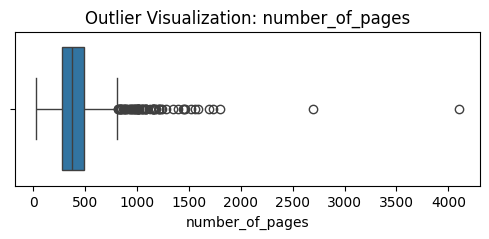

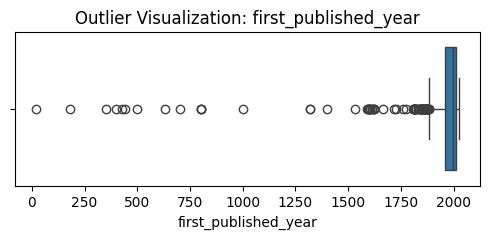

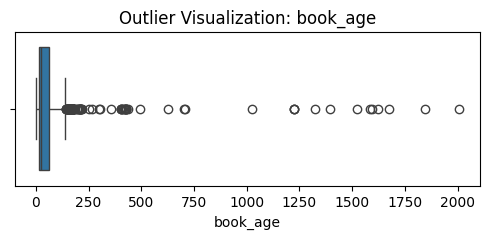

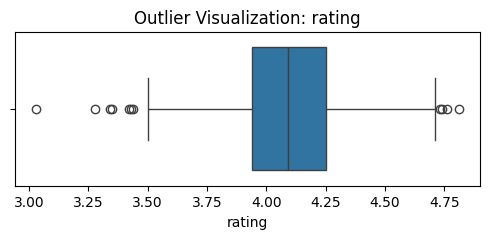

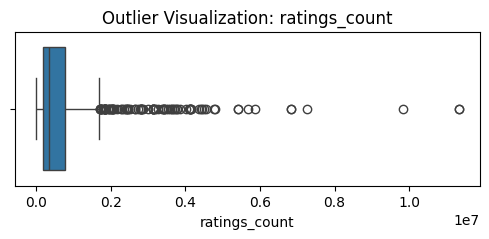

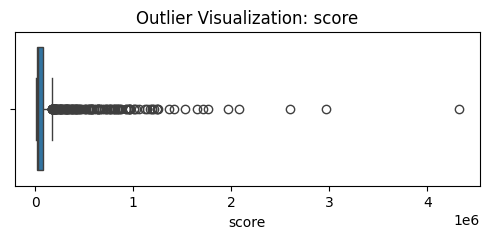

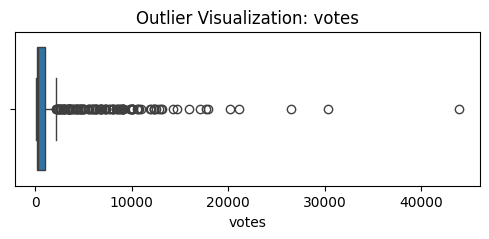

In [ ]:
## creating box plot for checking outliers

for col in num_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Visualization: {col}")
    plt.show()


- rating column has 11 outliers i Keep it as it is because ratings are naturally bounded (1–5)
- ratings_count has 96 outliers i Keep it and transform into log because popular books get huge counts, real signal
- same for votes has 119 outliers i Keep it and transform into log because
audience engagement feature
- score are highly correlated with ratings - data leakage so i keep it as it is because it will help in EDA.

In [ ]:
# Fix Year Outliers
# Books shouldn't be older than 200 years or published after 2025.

df = df[(df['first_published_year'] > 1800) & (df['first_published_year'] <= 2025)]
df['book_age'] = 2025 - df['first_published_year']

In [ ]:
# Fix Page Count Outliers
# Remove books with unrealistic page counts.

df = df[(df['number_of_pages'] >= 100) & (df['number_of_pages'] <= 1500)]

In [ ]:
# Log Transform Highly Skewed Columns
# Keep ratings_count and votes for better ML model performance:

df['ratings_count_log'] = np.log1p(df['ratings_count'])
df['votes_log'] = np.log1p(df['votes'])

In [ ]:
# This is outliers free df's rows and cloumns
df.shape

(934, 14)

In [ ]:
df.head()

,book_name,author,primary_genre,book_type,number_of_pages,first_published_year,book_age,rating,ratings_count,score,votes,book_url,ratings_count_log,votes_log
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,Young Adult,Hardcover,374,2008,17,4.35,9825418,4318854,43905,https://www.goodreads.com/book/show/2767052-th...,16.100483,10.689806
1,Pride and Prejudice,Jane Austen,Classics,Paperback,279,1813,212,4.29,4762344,2966459,30399,https://www.goodreads.com/book/show/1885.Pride...,15.376251,10.322198
2,To Kill a Mockingbird,Harper Lee,Classics,Paperback,323,1960,65,4.26,6833106,2602221,26573,https://www.goodreads.com/book/show/2657.To_Ki...,15.737290,10.187689
3,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,Fantasy,Hardcover,896,2003,22,4.50,3771857,2080496,21168,https://www.goodreads.com/book/show/58613451-h...,15.143078,9.960293
4,The Book Thief,Markus Zusak,Historical Fiction,Kindle,592,2005,20,4.39,2859705,1970739,20242,https://www.goodreads.com/book/show/19063.The_...,14.866229,9.915564


##### Final columns

In [ ]:
df.columns

Index(['book_name', 'author', 'primary_genre', 'book_type', 'number_of_pages',
       'first_published_year', 'book_age', 'rating', 'ratings_count', 'score',
       'votes', 'book_url', 'ratings_count_log', 'votes_log',
       'pages_category'],
      dtype='object')

In [ ]:
df['author'] = df['author'].astype('category')
df['primary_genre'] = df['primary_genre'].astype('category')
df['book_type'] = df['book_type'].astype('category')

In [ ]:
# Information of Clean data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   book_name             934 non-null    object  
 1   author                934 non-null    category
 2   primary_genre         934 non-null    category
 3   book_type             934 non-null    category
 4   number_of_pages       934 non-null    int64   
 5   first_published_year  934 non-null    int64   
 6   book_age              934 non-null    int64   
 7   rating                934 non-null    float64 
 8   ratings_count         934 non-null    int64   
 9   score                 934 non-null    int64   
 10  votes                 934 non-null    int64   
 11  book_url              934 non-null    object  
 12  ratings_count_log     934 non-null    float64 
 13  votes_log             934 non-null    float64 
 14  pages_category        934 non-null    category
dtypes: category

In [ ]:
# Final dataset and their ordering
df = df[[
    'book_name', 'author', 'primary_genre', 'book_type',
    'number_of_pages', 'pages_category', 'first_published_year', 'book_age',
    'rating', 'ratings_count', 'ratings_count_log', 'votes', 'votes_log',
    'score'
]]


In [ ]:
# Summerized the numrical columns
df.describe()

,number_of_pages,first_published_year,book_age,rating,ratings_count,ratings_count_log,votes,votes_log,score
count,934.000000,934.000000,934.000000,934.000000,9.340000e+02,934.000000,934.000000,934.000000,9.340000e+02
mean,421.066381,1982.274090,42.725910,4.093501,7.369277e+05,12.755716,1347.638116,6.199540,1.224797e+05
std,216.544587,43.683111,43.683111,0.233091,1.116849e+06,1.370201,3147.258640,1.214366,3.039466e+05
min,104.000000,1808.000000,1.000000,3.030000,1.032000e+03,6.940222,102.000000,4.634729,9.656000e+03
25%,288.000000,1968.000000,14.000000,3.950000,1.812230e+05,12.107489,189.000000,5.247024,1.478400e+04
50%,371.000000,2000.000000,25.000000,4.090000,3.621465e+05,12.799807,341.000000,5.834811,2.809650e+04
75%,490.500000,2011.000000,57.000000,4.240000,8.243050e+05,13.622296,907.750000,6.812070,7.500125e+04
max,1463.000000,2024.000000,217.000000,4.810000,1.132415e+07,16.242448,43905.000000,10.689806,4.318854e+06


In [ ]:
df.head(10)

,book_name,author,primary_genre,book_type,number_of_pages,pages_category,first_published_year,book_age,rating,ratings_count,ratings_count_log,votes,votes_log,score
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,Young Adult,Hardcover,374,Medium,2008,17,4.35,9825418,16.100483,43905,10.689806,4318854
1,Pride and Prejudice,Jane Austen,Classics,Paperback,279,Medium,1813,212,4.29,4762344,15.376251,30399,10.322198,2966459
2,To Kill a Mockingbird,Harper Lee,Classics,Paperback,323,Medium,1960,65,4.26,6833106,15.737290,26573,10.187689,2602221
3,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,Fantasy,Hardcover,896,Very Long,2003,22,4.50,3771857,15.143078,21168,9.960293,2080496
4,The Book Thief,Markus Zusak,Historical Fiction,Kindle,592,Long,2005,20,4.39,2859705,14.866229,20242,9.915564,1970739
5,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,Fantasy,Paperback,498,Long,2005,20,3.67,7263220,15.798334,17950,9.795401,1760818
6,Animal Farm,George Orwell,Classics,Mass,141,Short,1945,80,4.02,4505182,15.320739,17752,9.784310,1715357
8,The Chronicles of Narnia (The Chronicles of Na...,C.S. Lewis,Fantasy,Paperback,767,Long,1956,69,4.28,705079,13.466067,15973,9.678718,1533474
9,The Fault in Our Stars,John Green,Young Adult,Hardcover,313,Medium,2012,13,4.12,5683397,15.553060,14665,9.593287,1417114
10,The Picture of Dorian Gray,Oscar Wilde,Classics,Paperback,272,Medium,1890,135,4.13,1858300,14.435173,14265,9.565634,1368049


In [ ]:
# Save clean Dataset
df.to_csv('/content/drive/MyDrive/Python_Project/Capstone_Project/books_cleaned_data.csv', index=False)

# Exploratory Data Analysis & Visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('books_cleaned_data.csv')
df.head()

,book_name,author,primary_genre,book_type,number_of_pages,pages_category,first_published_year,book_age,rating,ratings_count,ratings_count_log,votes,votes_log,score
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,Young Adult,Hardcover,374,Medium,2008,17,4.35,9825418,16.100483,43905,10.689806,4318854
1,Pride and Prejudice,Jane Austen,Classics,Paperback,279,Medium,1813,212,4.29,4762344,15.376251,30399,10.322198,2966459
2,To Kill a Mockingbird,Harper Lee,Classics,Paperback,323,Medium,1960,65,4.26,6833106,15.737290,26573,10.187689,2602221
3,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,Fantasy,Hardcover,896,Very Long,2003,22,4.50,3771857,15.143078,21168,9.960293,2080496
4,The Book Thief,Markus Zusak,Historical Fiction,Kindle,592,Long,2005,20,4.39,2859705,14.866229,20242,9.915564,1970739


In [ ]:
df["author"].value_counts()

,count
author,
Sarah J. Maas,16
Stephen King,15
J.K. Rowling,11
Rick Riordan,11
C.S. Lewis,9
...,...
John Grisham,1
T.H. White,1
James Herriot,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   book_name             934 non-null    object 
 1   author                934 non-null    object 
 2   primary_genre         934 non-null    object 
 3   book_type             934 non-null    object 
 4   number_of_pages       934 non-null    int64  
 5   pages_category        934 non-null    object 
 6   first_published_year  934 non-null    int64  
 7   book_age              934 non-null    int64  
 8   rating                934 non-null    float64
 9   ratings_count         934 non-null    int64  
 10  ratings_count_log     934 non-null    float64
 11  votes                 934 non-null    int64  
 12  votes_log             934 non-null    float64
 13  score                 934 non-null    int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 102.3+ KB


In [ ]:
df.describe().round(3)

,number_of_pages,first_published_year,book_age,rating,ratings_count,ratings_count_log,votes,votes_log,score
count,934.000,934.000,934.000,934.000,9.340000e+02,934.000,934.000,934.000,934.000
mean,421.066,1982.274,42.726,4.094,7.369277e+05,12.756,1347.638,6.200,122479.671
std,216.545,43.683,43.683,0.233,1.116849e+06,1.370,3147.259,1.214,303946.596
min,104.000,1808.000,1.000,3.030,1.032000e+03,6.940,102.000,4.635,9656.000
25%,288.000,1968.000,14.000,3.950,1.812230e+05,12.107,189.000,5.247,14784.000
50%,371.000,2000.000,25.000,4.090,3.621465e+05,12.800,341.000,5.835,28096.500
75%,490.500,2011.000,57.000,4.240,8.243050e+05,13.622,907.750,6.812,75001.250
max,1463.000,2024.000,217.000,4.810,1.132415e+07,16.242,43905.000,10.690,4318854.000


In [ ]:
df.isnull().sum()

,0
book_name,0
author,0
primary_genre,0
book_type,0
number_of_pages,0
pages_category,0
first_published_year,0
book_age,0
rating,0
ratings_count,0


##### Rating Distribution

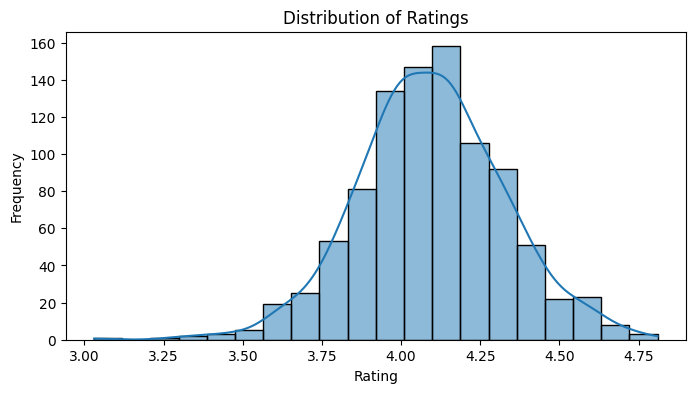

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

**Insight:**
- Most books have ratings between 3.9 to 4.3
- Very few books fall below 3.5, indicating only well-rated books remain popular
- Rating distribution is slightly left skewed

##### Genre Performance
Which genre gets highest rating?

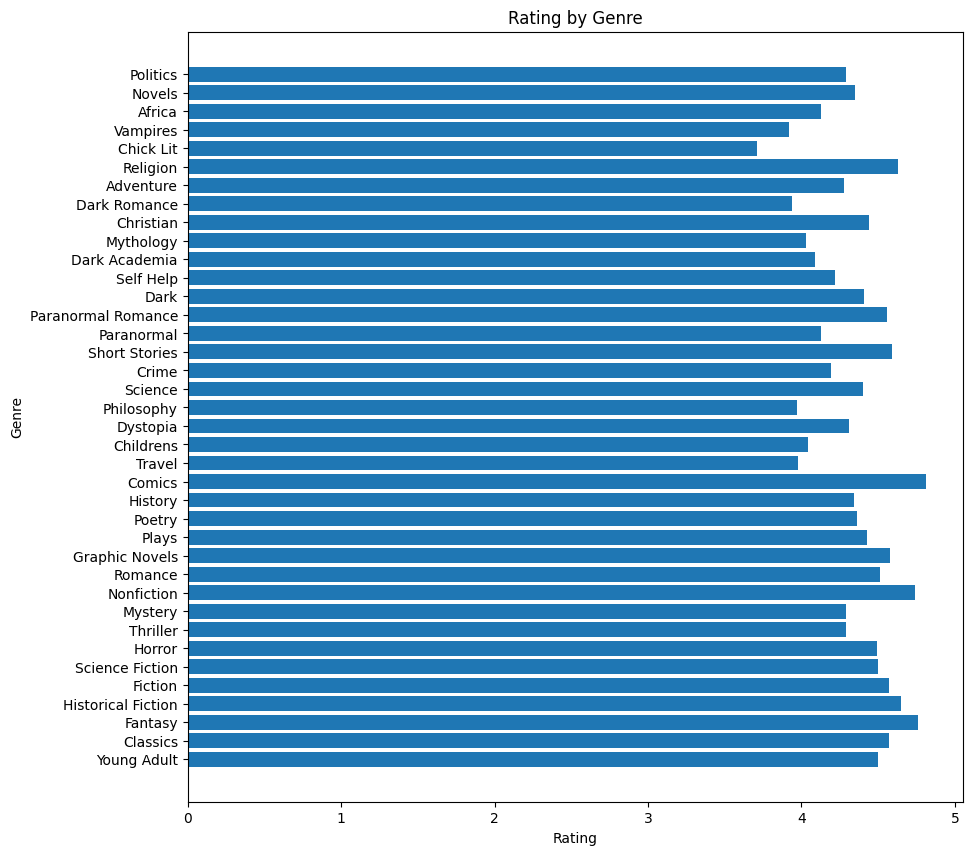

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(df['primary_genre'],df['rating'])
plt.title("Rating by Genre")
plt.ylabel("Genre")
plt.xlabel("Rating")
plt.show()

**Insight:**
- Genres like religion, comics, Nonfiction and Fantasy have the highest rating, showing stronger reader interest & engagement in these categories.
- Genres like chick Lit and Philosophy perform lower, indicating niche or inconsistent audience acceptance.

##### Top 10 Genres Distribution

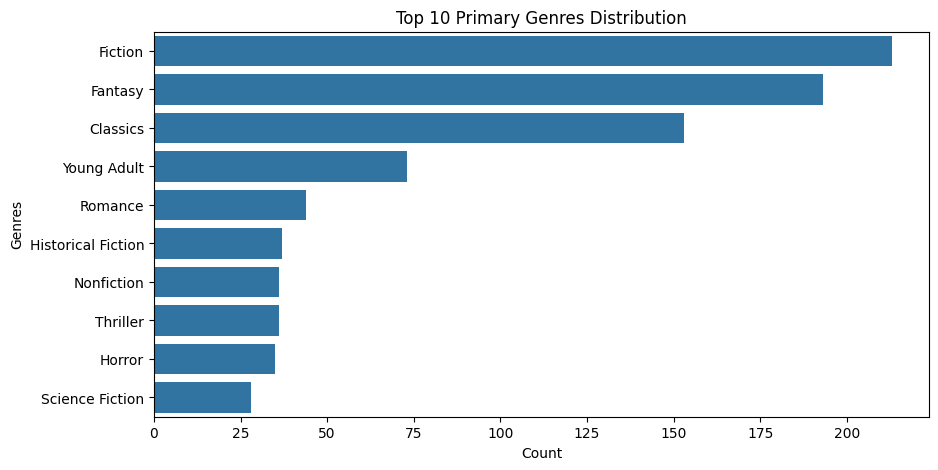

In [ ]:
# Top 10 Genres Distribution
top_genres = df['primary_genre'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Primary Genres Distribution")
plt.xlabel("Count")
plt.ylabel("Genres")
plt.show()

**Insight:**
- Fiction is the most dominant genre, followed by Fantasy and Classics, collectively contributing to a significant portion of the dataset.
- Thriller show moderate presence, while Science Fiction and Horror exhibit niche but focused representation.

##### Top 10 Author Productivity

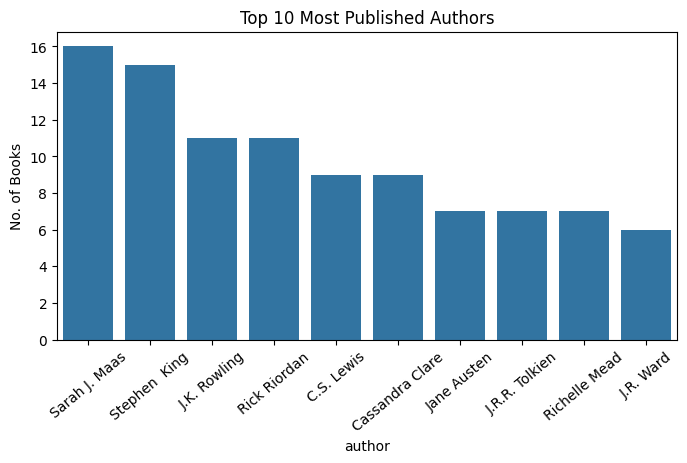

In [ ]:
# Select Only top 10 authers
top_authors = df['author'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_authors.index, y=top_authors.values)
plt.xticks(rotation=40)
plt.title("Top 10 Most Published Authors")
plt.ylabel("No. of Books")
plt.show()

**Insight:**

- Authors Sarah J. Maas and Stephen King appear frequently, suggesting established popularity or large series impact.

##### Pages vs Rating

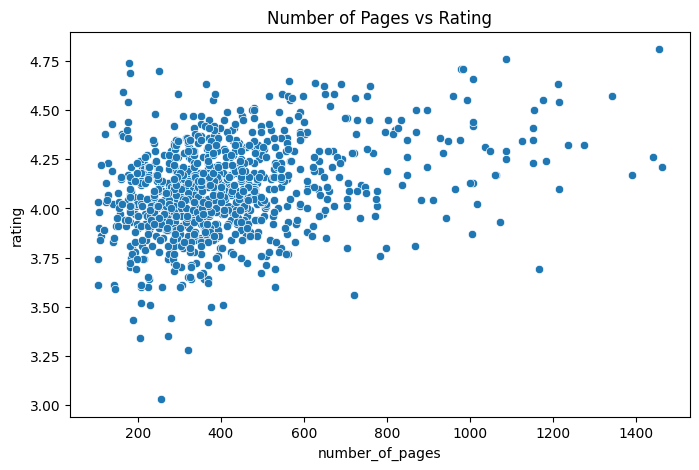

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="number_of_pages", y="rating")
plt.title("Number of Pages vs Rating")
plt.show()

**Insight:**
- The scatter plot shows a weak positive trend but no strong correlation between page count and rating. Most books, regardless of length (200–600 pages), fall between a rating of 3.8 to 4.4. This indicates that content quality & genre influence ratings more than book length.

##### Book Age vs Rating

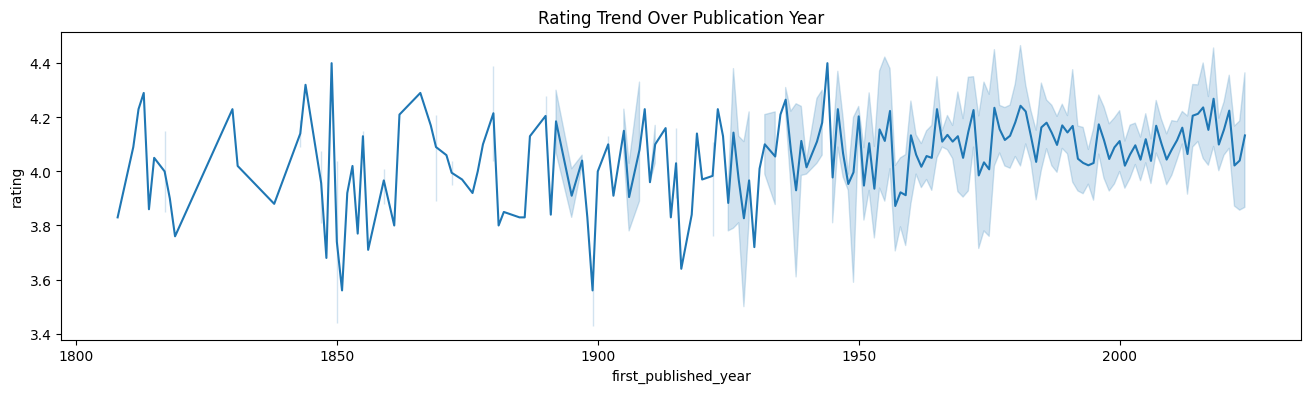

In [ ]:
plt.figure(figsize=(16,4))
sns.lineplot(data=df, x="first_published_year", y="rating")
plt.title("Rating Trend Over Publication Year")
plt.show()


**Insight:**
- Books published after 1950 show more stable and slightly higher ratings, mostly between 4.0 to 4.3.
- Older books (pre-1900) show higher volatility due to niche genre style, historical language, and limited audience reviews. This suggests that modern publication trends align better with reader preferences, improving average ratings.

##### Correlation Heatmap

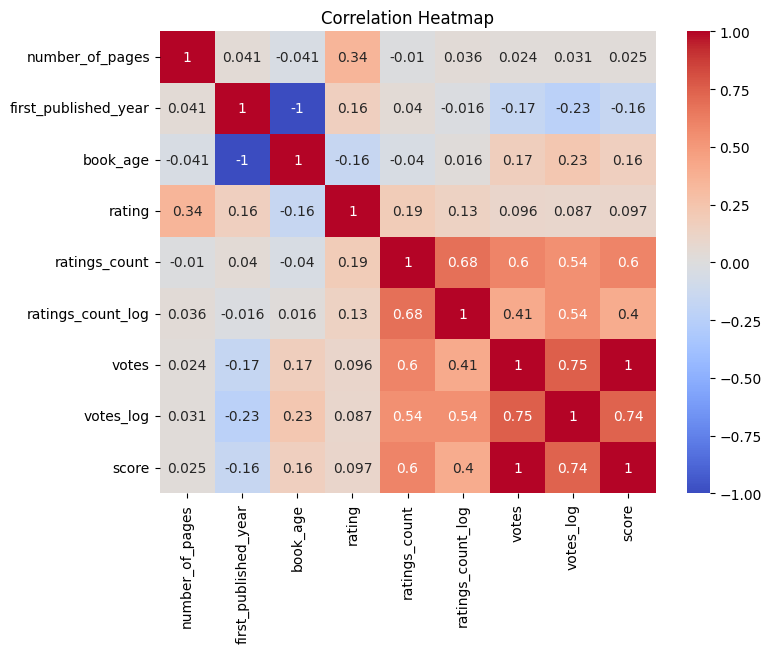

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Insight:**
- The heatmap indicates that ratings_count_log (community popularity) and number_of_pages show the strongest positive correlations with rating.
- Although the strength is moderate, these features are useful predictors. Weak correlations with book_age and first_published_year confirm that age alone does not determine rating, but rather the book's cultural relevance and engagement.

##### Pages Category vs Rating

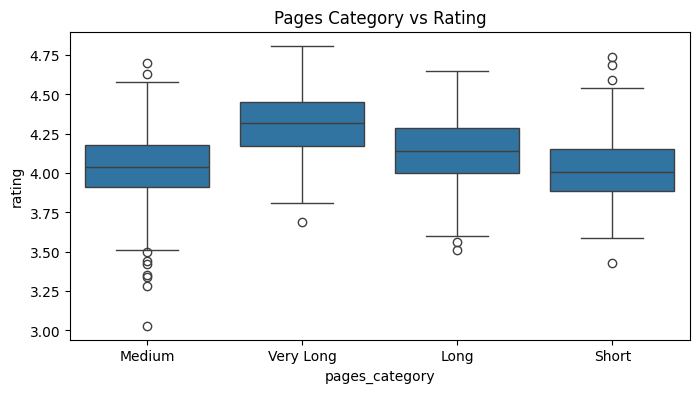

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="pages_category", y="rating")
plt.title("Pages Category vs Rating")
plt.show()

**Insight:**
- Very long books (over 600 pages) achieve the highest median ratings (approx. 4.2+), showing readers appreciate deeper content & detailed storytelling.

- Short books, while convenient, display wider variation & slightly lower ratings, indicating that engaging short-form storytelling is harder to execute consistently.

# Model Building & Evaluation

##### Prepare ML Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Load cleaned dataset
df = pd.read_csv('books_cleaned_data.csv')

# Remove irrelevant & leakage columns
df = df.drop(columns=['score', 'book_name', 'ratings_count', 'votes'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                934 non-null    object 
 1   primary_genre         934 non-null    object 
 2   book_type             934 non-null    object 
 3   number_of_pages       934 non-null    int64  
 4   pages_category        934 non-null    object 
 5   first_published_year  934 non-null    int64  
 6   book_age              934 non-null    int64  
 7   rating                934 non-null    float64
 8   ratings_count_log     934 non-null    float64
 9   votes_log             934 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 73.1+ KB


##### Outliers Handling

We apply scaling instead of removal because tree-based models RF handle outliers naturally and scaling improves gradient-based models like Linear Regression.

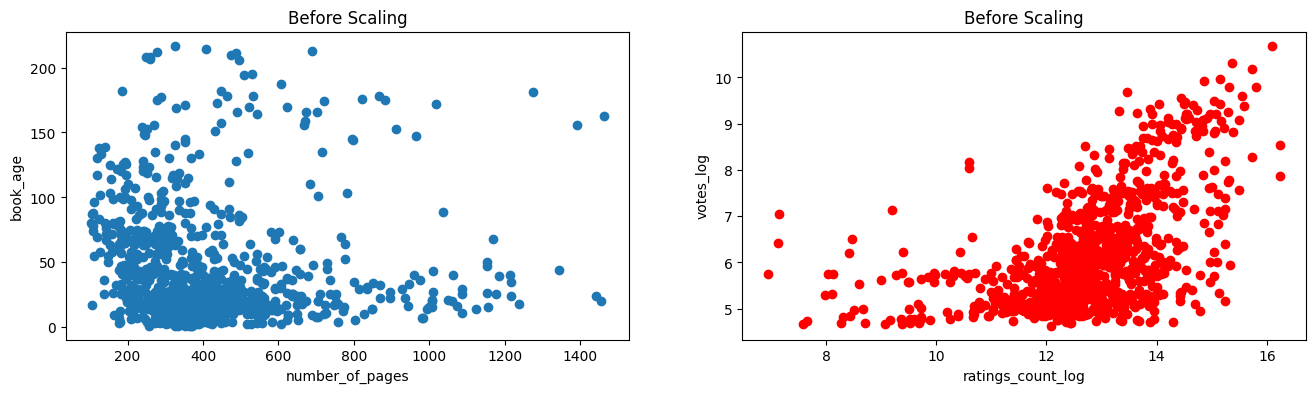

In [ ]:
# Numerical Columns Distribution before Scaling
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(16,4))

ax1.scatter(df["number_of_pages"],df['book_age'])
ax1.set_title("Before Scaling")
ax1.set_xlabel("number_of_pages")
ax1.set_ylabel("book_age")


ax2.scatter(df["ratings_count_log"],df['votes_log'],color="r")
ax2.set_title("Before Scaling")
ax2.set_xlabel("ratings_count_log")
ax2.set_ylabel("votes_log")

plt.show()

In [ ]:
# Standardize Numerical Columns
scale_cols = ['number_of_pages','ratings_count_log','votes_log','book_age']

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

df.head()

,author,primary_genre,book_type,number_of_pages,pages_category,first_published_year,book_age,rating,ratings_count_log,votes_log
0,Suzanne Collins,Young Adult,Hardcover,-0.217468,Medium,2008,-0.589237,4.35,2.442385,3.699602
1,Jane Austen,Classics,Paperback,-0.656412,Medium,1813,3.877123,4.29,1.913543,3.396723
2,Harper Lee,Classics,Paperback,-0.453112,Medium,1960,0.510175,4.26,2.177178,3.285899
3,J.K. Rowling,Fantasy,Hardcover,2.194412,Very Long,2003,-0.474715,4.50,1.743278,3.098544
4,Markus Zusak,Historical Fiction,Kindle,0.789792,Long,2005,-0.520523,4.39,1.541120,3.061691


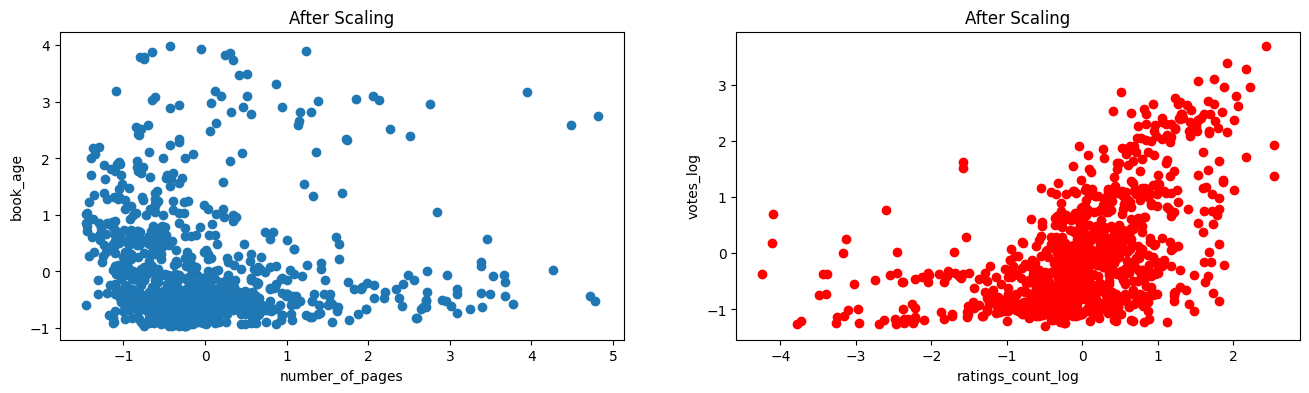

In [ ]:
# Numerical Columns Distribution before Scaling
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(16,4))

ax1.scatter(df["number_of_pages"],df['book_age'])
ax1.set_title("After Scaling")
ax1.set_xlabel("number_of_pages")
ax1.set_ylabel("book_age")


ax2.scatter(df["ratings_count_log"],df['votes_log'],color="r")
ax2.set_title("After Scaling")
ax2.set_xlabel("ratings_count_log")
ax2.set_ylabel("votes_log")

plt.show()

##### Handle Categorical Variables & Target Encoding (Authors)

In [ ]:
# Target Encode authors
df['author_te'] = df.groupby('author')['rating'].transform('mean')
df = df.drop(columns=['author'])

- One-Hot Encoding is NOT good for Authors
- We have around 600 unique authors in our dataset so it would create 600 new columns, making the model sparse, slow, and prone to overfitting.

**Instead of this we use Target Encoding to replace each author with avg rating of their books.**

In [ ]:
# One Hot Encode Categorical Columns (by get_dummies method)
categorical_cols = ['primary_genre', 'book_type', 'pages_category']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

df.head()


,number_of_pages,first_published_year,book_age,rating,ratings_count_log,votes_log,author_te,primary_genre_Africa,primary_genre_Chick Lit,primary_genre_Childrens,...,primary_genre_Vampires,primary_genre_Young Adult,book_type_Kindle,book_type_Mass,book_type_Nook,book_type_Paperback,book_type_ebook,pages_category_Medium,pages_category_Short,pages_category_Very Long
0,-0.217468,2008,-0.589237,4.35,2.442385,3.699602,4.262000,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-0.656412,1813,3.877123,4.29,1.913543,3.396723,4.122857,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,-0.453112,1960,0.510175,4.26,2.177178,3.285899,4.260000,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,2.194412,2003,-0.474715,4.50,1.743278,3.098544,4.484545,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.789792,2005,-0.520523,4.39,1.541120,3.061691,4.210000,0,0,0,...,0,0,1,0,0,0,0,0,0,0


##### Split Data

In [ ]:
# Features (X) & Target (y)
X = df.drop('rating', axis=1)
y = df['rating']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Train Shape:", X_train.shape, "\nTest Shape:", X_test.shape)


Train Shape: (700, 51) 
Test Shape: (234, 51)


##### Model 1: Linear Regression (Baseline)

In [ ]:

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print("Linear Regression Results:")
print("MAE:", lr_mae, "RMSE:", lr_rmse, "R2 Score:", lr_r2)


Linear Regression Results:
MAE: 0.062248555331024885 RMSE: 0.09798700912100154 R2 Score: 0.8389277209389505


In [ ]:
# Model score - R2_Score
lr_training_Score = lr_model.score(X_train,y_train)
lr_testing_Score = lr_model.score(X_test,y_test)
print('Training R2 Score:', lr_training_Score )
print('Testing R2 Score:', lr_testing_Score)

Training R2 Score: 0.856165148576272
Testing R2 Score: 0.8389277209389505


##### Model 2: Random Forest Regressor

In [ ]:

rf_model = RandomForestRegressor(n_estimators=300, random_state=42)

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Results:")
print("MAE:", rf_mae, "RMSE:", rf_rmse, "R2 Score:", rf_r2)


Random Forest Results:
MAE: 0.06697706552706575 RMSE: 0.10423305519757842 R2 Score: 0.8177385859400262


In [ ]:
# Model score - R2_Score
rf_training_Score = rf_model.score(X_train,y_train)
rf_testing_Score = rf_model.score(X_test,y_test)
print('Training R2 Score:', rf_training_Score )
print('Testing R2 Score:', rf_testing_Score)

Training R2 Score: 0.9725885620318554
Testing R2 Score: 0.8177385859400262


##### Compare Results

In [ ]:
results = {
    "Linear Regression": [lr_mae, lr_rmse, lr_training_Score, lr_r2],
    "Random Forest": [rf_mae, rf_rmse, rf_training_Score, rf_r2]
}

results_df = pd.DataFrame(results, index=["MAE", "RMSE", "Testing Score", "Testing/ R2 Scor"]).T
print("\nModel Comparison:")

results_df


Model Comparison:


,MAE,RMSE,Testing Score,Testing/ R2 Scor
Linear Regression,0.062249,0.097987,0.856165,0.838928
Random Forest,0.066977,0.104233,0.972589,0.817739


**Conclusion**

- Linear Regression - Best Performing Model

Linear Regression produced the lowest errors (MAE & RMSE) and the highest R² score, demonstrating that the relationship between features and book ratings is mostly linear.

- Random Forest Regressor - Good but Overfitting

Random Forest achieved reasonably high accuracy but exhibited overfitting, as seen from the difference between training and testing performance.

# **Final Project Conclusion**

1. Data Quality:

    The dataset scraped from Goodreads contained raw inconsistencies such as mixed formats, missing values, and text-based numerical fields. These issues were resolved through a systematic cleaning process, feature engineering, and type conversions. After preprocessing, the dataset was stable and ready for machine learning.

---

2.  Feature Importance & Insights:

  - Features like ratings_count_log, votes_log, and author_te (author target encoding) showed the strongest influence on book ratings.

  - Categorical features such as primary_genre and book_type also contributed to rating variations after One-Hot Encoding.

  - The analysis confirmed that page count and book age have a moderate impact, while score was excluded due to data leakage.

---

3. Model Selection:

    We benchmarked two machine learning models:
- Linear Regression
- Random Forest Regressor

Linear Regression delivered the best performance with:

- R² Score: 0.8389
- MAE: 0.0622
- RMSE: 0.0979

    This indicates that Goodreads book ratings follow a predominantly linear relationship with the selected features.

    Random Forest showed signs of overfitting (Train R2: 0.97 vs Test R2: 0.81) and was therefore not selected.

---

4. Outcome:

    The final model (Linear Regression) was successfully finalized as the prediction engine for estimating Goodreads book ratings based on metadata such as author reputation, genre, book structure, and audience interaction.

---